<a href="https://colab.research.google.com/github/michaelhu1/ResearchPaperNotebook/blob/main/Gas%20Emissions%20and%20Climate%20Change%20Perception.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Gas Emissions and Climate Change Perception

By Michael Hu and Mauricio Hernandez

In [ ]:
#import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr,ttest_ind

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pd.set_option('display.max_columns',None)
drive_folder = "/content/drive/MyDrive/Lumiere Program/Michael Hu/Data/"
#drive_folder = "/content/drive/MyDrive/Michael Hu/Data/"


### Reading Datasets

In [ ]:
#New datasets
#countries-with-legislative-regulatory-provisions-for-managing-disaster-risk.csv
Ref: https://ourworldindata.org/grapher/legislative-provisions-for-managing-disaster-risk

# Both datasets have the same information (just different countries)
#Ref: Climate Watch. 2020. GHG Emissions. Washington, DC: World Resources Institute. Available at: climatewatchdata.org/ghg-emissions.
# https://data.worldbank.org/indicator/EN.ATM.GHGT.KT.CE
# Total greenhouse has emission without Land Use, Land-Use Change and Forestry (LULUCF)
gas = pd.read_csv(drive_folder + "EN_ATM_GHGT_AIPfix.csv", index_col = 'GeoAreaName')
#Ref:

https://data.apps.fao.org/catalog/dataset/total-greenhouse-gas-emissions-per-year-as-reported-to-unfccc-en_atm_ghgt_naip/resource/7c980c72-0444-4b0d-abd4-fe545b5e8861
gasd = pd.read_csv(drive_folder + 'emission2 new.csv', index_col = 'GeoAreaName')

#Reading GDP info by country
#ref: The World Bank: https://data.worldbank.org/indicator/NY.GDP.MKTP.KD
df_gdp_cons =  pd.read_csv(drive_folder + "gdp constant new.csv", index_col = 'Country Name')

#Ref:
industry = pd.read_csv(drive_folder + "GDP – composition, by sector of origin.csv", index_col = 'Country')

#Ref:
gov = pd.read_csv(drive_folder + "gov data new.csv", index_col = 'Name')

#Ref:
public = pd.read_csv(drive_folder + "pew data1.csv", index_col = 'Country')

#Ref:
education = pd.read_csv(drive_folder + "education data new.csv", index_col = 'GeoAreaName')

### Datasets content

In [ ]:
gas.head()


,Goal,Target,Indicator,SeriesCode,SeriesDescription,GeoAreaCode,Reporting Type,Units,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51
GeoAreaName,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Australia,13,13.2,13.2.2,EN_ATM_GHGT_AIP,Total greenhouse gas emissions without LULUCF ...,36,G,MT_CO2E,524.21149,528.03842,534.41784,537.26231,540.38162,535.54922,537.20550,539.51105,530.31191,524.70940,533.06383,542.28787,549.33002,549.73194,545.15252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Austria,13,13.2,13.2.2,EN_ATM_GHGT_AIP,Total greenhouse gas emissions without LULUCF ...,40,G,MT_CO2E,92.14729,89.72878,86.98394,86.44021,79.77907,84.33672,82.12703,79.43238,79.81717,76.23867,78.46223,79.47101,81.86250,78.62764,79.84225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Belarus,13,13.2,13.2.2,EN_ATM_GHGT_AIP,Total greenhouse gas emissions without LULUCF ...,112,G,MT_CO2E,86.79869,90.64209,90.11701,92.95337,88.81449,90.69480,90.34230,91.37071,92.26423,91.04070,85.97545,87.74502,88.54220,89.06461,90.11570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bulgaria,13,13.2,13.2.2,EN_ATM_GHGT_AIP,Total greenhouse gas emissions without LULUCF ...,100,G,MT_CO2E,62.71487,63.37710,67.30794,65.99659,57.16397,59.79637,65.07143,60.08712,54.89392,57.98787,61.33835,58.80091,61.14847,57.28177,55.95528,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Canada,13,13.2,13.2.2,EN_ATM_GHGT_AIP,Total greenhouse gas emissions without LULUCF ...,124,G,MT_CO2E,738.71860,730.10194,751.66127,735.69285,693.59790,702.80275,714.07851,717.17239,725.37184,722.55767,723.09602,706.93391,716.09201,728.47589,730.24494,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
gasd.head()

,Goal,Target,Indicator,SeriesCode,SeriesDescription,GeoAreaCode,Reporting Type,Units,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51
GeoAreaName,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,13,13.2,13.2.2,EN_ATM_GHGT_NAIP,Total greenhouse gas emissions without LULUCF ...,4,G,MT_CO2E,19.32802,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.377,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,13,13.2,13.2.2,EN_ATM_GHGT_NAIP,Total greenhouse gas emissions without LULUCF ...,8,G,MT_CO2E,7.13113,7.18333,7.55147,7.63094,8.1257,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Angola,13,13.2,13.2.2,EN_ATM_GHGT_NAIP,Total greenhouse gas emissions without LULUCF ...,24,G,MT_CO2E,61.61076,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Argentina,13,13.2,13.2.2,EN_ATM_GHGT_NAIP,Total greenhouse gas emissions without LULUCF ...,32,G,MT_CO2E,NaN,NaN,NaN,NaN,NaN,332.49816,NaN,338.96335,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Armenia,13,13.2,13.2.2,EN_ATM_GHGT_NAIP,Total greenhouse gas emissions without LULUCF ...,51,G,MT_CO2E,NaN,7.02164,NaN,NaN,NaN,7.20217,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_gdp_cons.head()

,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Country Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Aruba,ABW,GDP (constant 2015 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.826161e+08,1.140605e+09,1.353313e+09,1.517468e+09,1.577581e+09,1.703201e+09,1.803390e+09,1.935176e+09,2.093936e+09,2.147271e+09,2.172733e+09,2.325843e+09,2.372174e+09,2.401542e+09,2.584458e+09,2.692901e+09,2.667109e+09,2.697004e+09,2.893373e+09,2.882236e+09,2.915062e+09,3.005333e+09,3.060434e+09,2.702866e+09,2.629007e+09,2.717520e+09,2.689383e+09,2.862306e+09,2.861720e+09,2.963128e+09,3.025850e+09,3.191738e+09,3.232184e+09,3.164774e+09,2.458429e+09,NaN
Africa Eastern and Southern,AFE,GDP (constant 2015 US$),NY.GDP.MKTP.KD,1.538290e+11,1.541980e+11,1.665040e+11,1.751030e+11,1.831230e+11,1.928790e+11,2.004240e+11,2.109600e+11,2.194490e+11,2.310360e+11,2.418960e+11,2.548900e+11,2.603710e+11,2.719240e+11,2.879370e+11,2.929190e+11,3.012560e+11,3.049640e+11,3.081160e+11,3.167300e+11,3.338940e+11,3.483550e+11,3.501260e+11,3.506590e+11,3.612000e+11,3.595830e+11,3.678030e+11,3.833710e+11,3.986970e+11,4.102500e+11,4.100870e+11,4.105190e+11,4.023940e+11,4.008150e+11,4.089350e+11,4.264820e+11,4.496680e+11,4.695610e+11,4.782400e+11,4.908480e+11,5.072960e+11,5.258560e+11,5.463300e+11,5.631590e+11,5.941790e+11,6.305240e+11,6.718540e+11,7.162260e+11,7.473340e+11,7.530230e+11,7.918200e+11,8.209660e+11,8.285440e+11,8.633450e+11,8.977440e+11,9.242530e+11,9.447430e+11,9.689020e+11,9.929810e+11,1.013100e+12,9.838520e+11,1.026190e+12
Afghanistan,AFG,GDP (constant 2015 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.228792e+09,7.867259e+09,7.978512e+09,8.874476e+09,9.349917e+09,1.064267e+10,1.106039e+10,1.342627e+10,1.535460e+10,1.542007e+10,1.738648e+10,1.836025e+10,1.886049e+10,1.913421e+10,1.956671e+10,2.008464e+10,2.032349e+10,2.111846e+10,2.062195e+10,NaN
Africa Western and Central,AFW,GDP (constant 2015 US$),NY.GDP.MKTP.KD,1.048450e+11,1.067830e+11,1.108090e+11,1.188670e+11,1.252820e+11,1.303560e+11,1.280260e+11,1.158040e+11,1.175010e+11,1.357050e+11,1.600080e+11,1.773010e+11,1.828790e+11,1.905840e+11,2.101190e+11,2.055710e+11,2.232060e+11,2.337550e+11,2.286260e+11,2.405850e+11,2.453860e+11,2.283740e+11,2.207230e+11,2.063010e+11,2.074550e+11,2.189720e+11,2.220700e+11,2.252860e+11,2.362000e+11,2.415660e+11,2.574200e+11,2.603060e+11,2.673190e+11,2.642160e+11,2.634250e+11,2.685010e+11,2.809300e+11,2.928260e+11,3.030940e+11,3.074010e+11,3.188820e+11,3.355040e+11,3.687170e+11,3.890650e+11,4.202430e+11,4.448200e+11,4.687270e+11,4.946510e+11,5.257120e+11,5.586980e+11,5.975660e+11,6.265380e+11,6.587610e+11,6.989730e+11,7.404040e+11,7.607340e+11,7.617070e+11,7.793610e+11,8.023690e+11,8.280650e+11,8.206380e+11,8.527640e+11
Angola,AGO,GDP (constant 2015 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.213339e+10,2.115952e+10,2.115952e+10,2.204822e+10,2.337111e+10,2.418910e+10,2.489058e+10,2.590680e+10,2.749460e+10,2.750605e+10,2.655706e+10,2.682034e+10,2.525449e+10,1.919760e+10,1.945473e+10,2.237294e+10,2.540321e+10,2.725111e+10,2.852950e+10,2.915187e+10,3.004235e+10,3.130593e+10,3.558410e+10,3.664806e+10,4.066102e+10,4.677238e+10,5.217459e+10,5.948425e+10,6.612864e+10,6.669734e+10,6.993883e+10,7.236571e+10,7.854574e+10,8.243376e+10,8.640706e+10,8.721929e+10,8.496903e+10,8.484158e+10,8.372480e+10,8.313873e+10,7.856610e+10,7.911606e+10


In [ ]:
gov.head()

,Constitutional form,Head of state,Basis of executive legitimacy
Name,,,
Afghanistan,Provisional,NaN,No constitutionally-defined basis to current r...
Albania,Republic,Ceremonial,Ministry is subject to parliamentary confidence
Algeria,Republic,Executive,Presidency independent of legislature; ministr...
Andorra,Constitutional monarchy,Ceremonial,Ministry is subject to parliamentary confidence
Angola,Republic,Executive,Presidency is independent of legislature


In [ ]:
public.head()

,Survey,Very concerned,Somewhat concerned,Not too concerned,Not at all concerned,Climate change does not exist (Vol.),DK/Refused,Unnamed: 8,Unnamed: 9
Country,,,,,,,,,
Argentina,Spring 2015,58,31,7,3,0,0,NaN,NaN
Australia,Spring 2021,34,30,21,14,0,0,NaN,NaN
Belgium,Spring 2021,29,39,21,11,0,0,NaN,NaN
Brazil,Spring 2015,78,16,4,2,0,0,NaN,NaN
Britain,Spring 2021,37,34,15,14,0,0,NaN,NaN


In [ ]:
education.head()

,Goal,Target,Indicator,SeriesCode,SeriesDescription,GeoAreaCode,Reporting Type,Units,2020
GeoAreaName,,,,,,,,,
Afghanistan,12,12.8,12.8.1,SE_GCEDESD_NEP,Extent to which global citizenship education a...,4,G,INDEX,NaN
Africa,12,12.8,12.8.1,SE_GCEDESD_NEP,Extent to which global citizenship education a...,2,G,INDEX,NaN
Åland Islands,12,12.8,12.8.1,SE_GCEDESD_NEP,Extent to which global citizenship education a...,248,G,INDEX,NaN
Albania,12,12.8,12.8.1,SE_GCEDESD_NEP,Extent to which global citizenship education a...,8,G,INDEX,0.719
Algeria,12,12.8,12.8.1,SE_GCEDESD_NEP,Extent to which global citizenship education a...,12,G,INDEX,0.625


**Subsetting datasets and creating some indicators**

In [ ]:
#gasd2 = gasd.loc[["China", "Ethiopia", "Malaysia","Mexico"],["2005","2006","2007","2008","2009", "2010", "2011","2012","2013","2014","2015","2016","2017","2018"]]
gasd2 = gasd.loc[:,["2005","2006","2007","2008","2009", "2010", "2011","2012","2013","2014","2015","2016","2017","2018"]].copy()

gas2 = gas.loc[:,["2005","2006","2007","2008","2009", "2010", "2011","2012","2013","2014","2015","2016","2017","2018","2019"]].copy()
#selecting the
public2 = public.iloc[:,[1,2,3,4,5,6]].copy()

In [ ]:
#creating Perception Score
public2["Perception Score"]=(public2["Very concerned"]*1+public2["Somewhat concerned"]*0.5-public2["Not at all concerned"]*0.5-public2["Climate change does not exist (Vol.)"])/(public2["Very concerned"]+public2["Somewhat concerned"]+public2["Not too concerned"]+public2["Not at all concerned"]+public2["Climate change does not exist (Vol.)"])
public2["Percentage Very Concerned"]=(public2["Very concerned"] )/(public2["Very concerned"]+public2["Somewhat concerned"]+public2["Not too concerned"]+public2["Not at all concerned"]+public2["Climate change does not exist (Vol.)"])

#public_gas["pchange"] = (public_gas['2019'] -  public_gas['2012'] )/public_gas['2019']
#gas2["pchange"] = gas2['2012']/gas2['2019']
gas2["pchange"] = 100*(gas2['2019'] -  gas2['2012'])/gas2['2012']
#gas["pchange"] = gas['2012']/gas['2019']

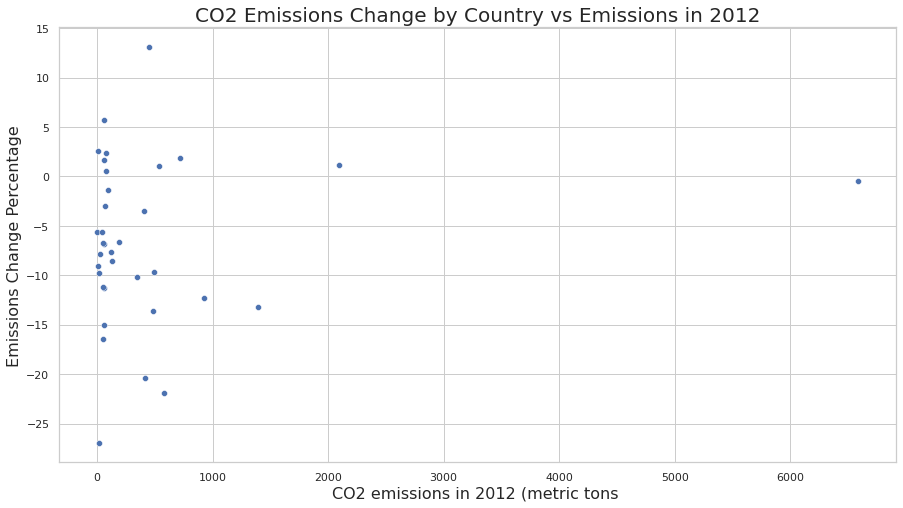

In [ ]:
# plot CO2
sns.set(style='whitegrid', rc = {'figure.figsize':(15,8)})
sns.set(style='whitegrid')
p = sns.scatterplot(x="2012",
                    y="pchange",
                    data=gas2)

p.set_xlabel("CO2 emissions in 2012 (metric tons ", fontsize = 16)
p.set_ylabel("Emissions Change Percentage", fontsize = 16)

#add overall title to plot
#p.set(title='CO2 Emissions in 2010')
p.set_title("CO2 Emissions Change by Country vs Emissions in 2012", fontsize = 20)
plt.savefig(drive_folder + 'figs/co2_emission.png')


Text(0.5, 1.0, 'CO2 Emissions Change by Country vs Emissions in 2012')

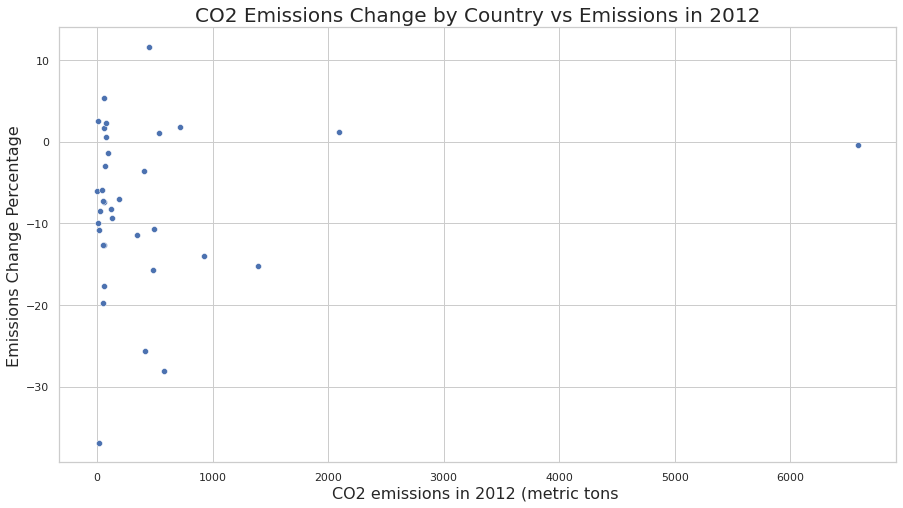

In [ ]:
# plot CO2
sns.set(style='whitegrid', rc = {'figure.figsize':(15,8)})
sns.set(style='whitegrid')
p = sns.scatterplot(x="2012",
                    y="pchange",
                    data=gas)

p.set_xlabel("CO2 emissions in 2012 (metric tons ", fontsize = 16)
p.set_ylabel("Emissions Change Percentage", fontsize = 16)

#add overall title to plot
#p.set(title='CO2 Emissions in 2010')
p.set_title("CO2 Emissions Change by Country vs Emissions in 2012", fontsize = 20)
#plt.savefig(drive_folder + 'figs/co2_emission.png')

## Descriptive Statistics

In [ ]:
#CO2 emissions by country
gas2.T.describe()

GeoAreaName,Australia,Austria,Belarus,Bulgaria,Canada,Croatia,Cyprus,Czechia,Denmark,Estonia,Finland,France,Germany,Hungary,Ireland,Italy,Japan,Luxembourg,Monaco,Netherlands,New Zealand,Norway,Poland,Portugal,Romania,Russia,Slovakia,Slovenia,Spain,Sweden,Switzerland,Turkey,Ukraine,Britain,United States
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000
mean,503.262486,77.238140,84.068044,56.346111,677.399291,24.365128,8.620967,126.693860,53.738270,16.231222,59.827488,462.711904,864.324400,62.114699,58.944470,458.080840,1240.571629,10.126233,-0.292217,184.250564,75.392679,50.131286,380.056981,65.904892,116.586539,1915.390418,41.056901,16.967955,341.289385,53.883049,47.182862,411.380661,366.022602,530.860767,6444.494804
std,134.148538,20.935527,22.866855,17.373126,180.726873,9.200079,1.724409,37.331440,21.463778,14.292012,22.500612,130.798245,239.313724,16.158573,15.837191,139.766020,339.790328,5.422130,1.524536,51.896343,19.552325,15.390972,102.844055,19.568543,36.161189,513.149400,13.026780,7.578356,104.120825,18.543973,16.260678,121.058572,116.036181,168.546037,1748.643679
min,1.034843,0.513350,-1.392665,-7.384183,1.790160,-8.505055,2.532141,-9.377283,-19.701093,-36.844110,-17.693019,-10.677909,-14.021202,5.394209,1.660320,-15.763920,-15.258508,-9.910265,-6.009208,-7.083608,2.273625,-7.279635,-3.642020,-3.048134,-8.278191,1.122634,-5.909859,-10.853274,-11.378692,-12.679905,-12.661612,11.559100,-25.690331,-28.099044,-0.420267
25%,529.743538,79.231195,88.342905,57.252320,712.292360,23.835195,8.547430,128.409018,49.715457,18.483990,56.018910,463.451385,898.960272,61.376880,58.731500,431.672642,1278.171700,10.505030,0.085695,189.505240,78.587873,52.843245,393.739395,64.939030,113.539805,2020.404345,41.012205,17.407668,325.573445,53.431287,48.278948,390.711498,336.120887,481.457137,6579.017122
50%,536.377360,79.829710,90.116355,59.941745,722.826845,25.175100,8.905610,132.299375,55.699245,20.099270,62.599790,489.594165,912.981025,64.574795,62.032135,466.698475,1318.887170,11.433400,0.087600,193.244275,80.484425,53.993605,405.100460,67.452880,116.847955,2037.482705,42.267960,18.569290,344.527955,56.547700,51.276315,433.907385,398.717105,565.102905,6768.334590
75%,540.858182,84.862593,90.781275,62.880427,730.137690,28.546020,9.448490,141.176675,65.282440,21.186833,70.254878,517.189017,949.796163,67.438437,63.927373,527.385083,1361.936047,12.150118,0.091475,205.460400,80.686610,55.245182,413.563770,73.805305,129.389385,2070.786237,46.142435,19.818452,382.273100,63.231032,53.478058,479.723560,431.812040,619.168252,7049.492000
max,549.731940,92.147290,92.953370,67.307940,751.661270,31.485740,10.006340,150.776590,75.303400,22.206850,81.228180,555.961770,999.354670,76.717560,70.264340,589.071610,1405.888610,13.005050,0.098200,212.553100,82.518410,56.895400,420.408330,85.704340,149.935510,2133.581600,50.357190,21.543280,446.328120,66.662530,55.348190,524.980920,463.030000,690.112270,7449.616030


In [ ]:
gasd2.T.describe()

GeoAreaName,Afghanistan,Albania,Angola,Argentina,Armenia,Azerbaijan,Bangladesh,Barbados,Bhutan,Botswana,Burkina Faso,Burundi,Chile,China,Costa Rica,Ecuador,Egypt,Ethiopia,Georgia,Ghana,Guatemala,India,Jamaica,Jordan,Kazakhstan,Kiribati,Kuwait,Kyrgyzstan,Lebanon,Malaysia,Maldives,Marshall Islands,Mauritius,Mexico,Mongolia,Montenegro,Morocco,Myanmar,Nauru,Niger,Pakistan,Palau,Paraguay,Peru,Qatar,Republic of Korea,Saint Lucia,Saudi Arabia,Solomon Islands,State of Palestine,Tajikistan,Thailand,Togo,Tonga,Turkmenistan,Tuvalu,United Arab Emirates,Uruguay,Uzbekistan,Zimbabwe
count,2.000000,5.000000,1.00000,2.000000,2.000000,9.000000,1.00000,6.000000,11.000000,1.00000,1.00000,3.000000,4.000000,4.000000,1.00000,3.000000,1.00000,9.000000,9.000000,2.000000,1.00000,1.00000,6.000000,1.000,14.000000,4.000000,1.00000,6.000000,3.000000,7.000000,5.000000,2.000000,3.000000,9.000000,1.00000,7.000000,5.000000,1.0000,2.000000,1.00,3.000000,1.00000,3.000000,2.000000,1.00000,12.000000,2.000000,2.000000,2.000000,1.00000,6.000000,9.000000,1.00000,1.00000,1.0000,1.00000,2.000000,7.000000,8.000000,1.00000
mean,31.352510,7.524514,61.61076,335.730755,7.111905,50.504377,99.44224,1.809000,1.650176,23.97758,20.41301,1.709123,94.663030,10688.574000,12.11403,54.908650,241.63156,83.542909,14.335437,17.222085,22.94827,2100.84973,15.918617,27.752,324.957846,0.182290,86.33698,12.573397,25.614383,280.542827,1.425118,0.152455,5.473823,618.012528,17.71095,4.164020,86.592678,38.3749,0.032395,15.52,359.755333,0.34648,40.538467,82.577510,61.59297,641.278296,0.596870,536.797350,0.555815,3.26175,8.014833,306.653989,6.15802,0.19219,66.3672,0.01843,197.593305,33.494471,207.991221,21.18472
std,17.005197,0.401446,NaN,4.571580,0.127654,3.483300,NaN,0.135594,0.280655,NaN,NaN,0.229136,13.173177,1934.230419,NaN,6.120827,NaN,11.272417,1.895259,1.421221,NaN,NaN,1.324174,NaN,39.807752,0.110096,NaN,1.029509,0.979202,13.627164,0.106689,0.024558,1.124622,31.008512,NaN,0.563780,11.538036,NaN,0.013852,NaN,37.396074,NaN,7.160808,2.809321,NaN,57.085135,0.071743,16.214241,0.088806,NaN,0.337922,12.510708,NaN,NaN,NaN,NaN,3.231909,2.124109,9.606129,NaN
min,19.328020,7.131130,61.61076,332.498160,7.021640,46.944330,99.44224,1.643000,1.295510,23.97758,20.41301,1.480910,78.955190,8015.000000,12.11403,48.201190,241.63156,62.776980,11.408130,16.217130,22.94827,2100.84973,14.866260,27.752,262.116250,0.031230,86.33698,11.369690,24.484860,262.996440,1.282100,0.135090,4.342160,561.540100,17.71095,3.084510,74.681600,38.3749,0.022600,15.52,320.234000,0.34648,32.296220,80.591020,61.59297,559.059090,0.546140,525.332150,0.493020,3.26175,7.630000,287.728000,6.15802,0.19219,66.3672,0.01843,195.308000,31.199580,196.226630,21.18472
25%,25.340265,7.183330,61.61076,334.114457,7.066772,48.281830,99.44224,1.698000,1.481960,23.97758,20.41301,1.594100,86.801038,9911.248250,12.11403,52.267160,241.63156,74.642460,13.052950,16.719608,22.94827,2100.84973,15.072315,27.752,293.052365,0.135540,86.33698,11.696130,25.309810,271.861170,1.351700,0.143772,4.915100,605.887320,17.71095,3.944205,76.369400,38.3749,0.027497,15.52,342.341500,0.34648,38.192335,81.584265,61.59297,589.387225,0.571505,531.064750,0.524417,3.26175,7.725250,301.055000,6.15802,0.19219,66.3672,0.01843,196.450652,32.077015,202.829827,21.18472
50%,31.352510,7.551470,61.61076,335.730755,7.111905,49.235650,99.44224,1.819000,1.623530,23.97758,20.41301,1.707290,95.448455,11219.548000,12.11403,56.333130,241.63156,86.741500,13.770380,17.222085,22.94827,2100.84973,15.647920,27.752,318.924250,0.213360,86.33698,12.626200,26.134760,280.071160,1.447680,0.152455,5.488040,623.101900,17.71095,4.365870,85.287900,38.3749,0.032395,15.52,364.449000,0.34648,44.088450,82.577510,61.59297,670.250770,0.596870,536.797350,0.555815,3.26175,8.030000,304.459000,6.15802,0.19219,66.3672,0.01843,197.593305,32.564600,206.422260,21.18472
75%,37.364755,7.630940,61.61076,337.347053,7.157037,51.803950,99.44224,1.907000,1.797630,23.97758,20.41301,1.823230,103.310448,11996.873750,12.11403,58.262380,2

## Merging datasets

In [ ]:
public_gas = pd.merge(gas2,public,left_index=True,right_index=True)
combinegas = gas2.append(gasd2)
public_gasd = pd.merge(combinegas,public2,left_index=True,right_index=True)
df_countries = pd.merge(public_gasd,df_gdp_cons,left_index=True,right_index=True)

In [ ]:
df_countries

,2005_x,2006_x,2007_x,2008_x,2009_x,2010_x,2011_x,2012_x,2013_x,2014_x,2015_x,2016_x,2017_x,2018_x,2019_x,pchange,Very concerned,Somewhat concerned,Not too concerned,Not at all concerned,Climate change does not exist (Vol.),DK/Refused,Perception Score,Percentage Very Concerned,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005_y,2006_y,2007_y,2008_y,2009_y,2010_y,2011_y,2012_y,2013_y,2014_y,2015_y,2016_y,2017_y,2018_y,2019_y,2020,2021
Argentina,NaN,NaN,NaN,NaN,NaN,332.49816,NaN,338.96335,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58,31,7,3,0,0,0.727273,0.585859,ARG,GDP (constant 2015 US$),NY.GDP.MKTP.KD,1.507980e+11,1.589830e+11,1.576280e+11,1.492610e+11,1.643820e+11,1.817560e+11,1.805570e+11,1.863200e+11,1.953050e+11,2.142100e+11,2.207340e+11,2.332240e+11,2.370210e+11,2.436860e+11,2.571710e+11,2.570980e+11,2.519090e+11,2.693770e+11,2.572380e+11,2.835350e+11,2.878420e+11,2.729030e+11,2.708960e+11,2.826770e+11,2.871170e+11,2.722190e+11,2.889690e+11,2.967850e+11,2.935510e+11,2.725410e+11,2.658170e+11,2.900950e+11,3.131200e+11,3.388180e+11,3.585920e+11,3.483890e+11,3.676440e+11,3.974640e+11,4.127670e+11,3.987930e+11,3.956460e+11,3.782030e+11,3.369990e+11,3.667800e+11,3.998990e+11,4.352970e+11,4.703260e+11,5.126910e+11,5.334920e+11,5.019170e+11,5.527380e+11,5.859240e+11,5.799100e+11,5.938590e+11,5.789380e+11,5.947490e+11,5.823770e+11,5.987910e+11,5.831180e+11,5.713050e+11,5.147720e+11,5.676070e+11
Australia,524.21149,528.03842,534.41784,537.26231,540.38162,535.54922,537.20550,539.51105,530.31191,524.70940,533.06383,542.28787,549.33002,549.73194,545.15252,1.034843,34,30,21,14,0,0,0.424242,0.343434,AUS,GDP (constant 2015 US$),NY.GDP.MKTP.KD,2.050490e+11,2.101410e+11,2.128610e+11,2.260900e+11,2.418680e+11,2.563340e+11,2.624390e+11,2.789830e+11,2.931970e+11,3.138490e+11,3.363700e+11,3.498230e+11,3.634980e+11,3.730190e+11,3.883330e+11,3.935190e+11,4.037170e+11,4.182220e+11,4.219610e+11,4.390540e+11,4.523810e+11,4.674850e+11,4.830190e+11,4.722860e+11,4.939920e+11,5.199370e+11,5.408960e+11,5.546780e+11,5.865360e+11,6.092030e+11,6.309730e+11,6.284800e+11,6.310800e+11,6.565350e+11,6.826690e+11,7.088410e+11,7.361630e+11,7.649340e+11,8.002280e+11,8.397330e+11,8.725870e+11,8.903730e+11,9.261170e+11,9.549220e+11,9.950810e+11,1.026530e+12,1.054520e+12,1.094260e+12,1.133400e+12,1.154560e+12,1.179640e+12,1.208780e+12,1.256130e+12,1.288790e+12,1.321820e+12,1.350530e+12,1.387560e+12,1.419420e+12,1.460170e+12,1.491030e+12,1.490970e+12,1.512960e+12
Burkina Faso,NaN,NaN,20.41301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77,18,4,1,0,1,0.855000,0.770000,BFA,GDP (constant 2015 US$),NY.GDP.MKTP.KD,1.166783e+09,1.213967e+09,1.288368e+09,1.272031e+09,1.301070e+09,1.350049e+09,1.357307e+09,1.477067e+09,1.522424e+09,1.553269e+09,1.555087e+09,1.577066e+09,1.613520e+09,1.620770e+09,1.755073e+09,1.807697e+09,1.961982e+09,1.969249e+09,2.059988e+09,2.135479e+09,2.152496e+09,2.244091e+09,2.458676e+09,2.467182e+09,2.423299e+09,2.629700e+09,2.838902e+09,2.832193e+09,2.996335e+09,3.060764e+09,3.042310e+09,3.318247e+09,3.325969e+09,3.441094e+09,3.486344e+09,3.685637e+09,4.091600e+09,4.350060e+09,4.667950e+09,5.013156e+09,5.107828e+09,5.445630e+09,5.682676e+09,6.126066e+09,6.400419e+09,6.954815e+09,7.389711e+09,7.693531e+09,8.139755e+09,8.380850e+09,9.088720e+09,9.690627e+09,1.031593e+10,1.091349e+10,1.138570e+10,1.183216e+10,1.253712e+10,1.331486e+10,1.419424e+10,1.500163e+10,1.529121e+10,1.634727e+10
Canada,738.71860,730.10194,751.66127,735.69285,693.59790,702.80275,714.07851,717.17239,725.37184,722.55767,723.09602,706.93391,716.09201,728.47589,730.24494,1.790160,34,34,19,12,0,0,0.454545,0.343434,CAN,GDP (constant 2015 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [ ]:
#df_merge = pd.merge(public_gasd[['Perception Score']],public_gas[['pchange']], left_index=True, right_index=True)
df_merge = pd.merge(public_gasd[['Perception Score']],combinegas[['pchange']], left_index=True, right_index=True)

df_merge = pd.merge(df_merge, education[['2020']], left_index=True, right_index=True)
df_merge = pd.merge(df_merge , gov[['Constitutional form']], left_index=True, right_index=True)
df_merge = pd.merge(df_merge , industry[['Agriculture %',	'Industry %',	'Services %']], left_index=True, right_index=True)

df_merge.drop_duplicates(inplace = True)
df_merge


NameError: ignored

In [ ]:
merge = pd.merge(public_gasd.loc[:,'Perception Score'],public_gas.loc[:,'pchange'],left_index=True,right_index=True)
merge = pd.merge(merge, education.loc[:,'2020'],left_index=True,right_index=True)
merge = pd.merge(merge , gov.loc[:,'Constitutional form'],left_index=True,right_index=True)
merge

,Perception Score,pchange,2020,Constitutional form
Australia,0.424242,1.034843,NaN,Constitutional monarchy
Australia,0.424242,1.034843,NaN,Constitutional monarchy
Australia,0.424242,1.034843,NaN,Constitutional monarchy
Britain,0.470000,-28.099044,0.413,Constitutional monarchy
Britain,0.470000,-28.099044,0.413,Constitutional monarchy
Britain,0.470000,-28.099044,0.413,Constitutional monarchy
Canada,0.454545,1.790160,0.875,Constitutional monarchy
Canada,0.454545,1.790160,0.875,Constitutional monarchy
Canada,0.454545,1.790160,0.875,Constitutional monarchy
France,0.555556,-10.677909,1.000,Republic


**Correlation of variables**

In [ ]:
pearsonr(public_gas["pchange"],public_gas["Perception Score"])

(0.0694909907348025, 0.7981635423696599)

Linear Regression

In [ ]:
underhalf = public_gas.loc[public_gas["Perception Score"] < 0.5,"pchange"]

In [ ]:
overhalf = public_gas.loc[public_gas["Perception Score"] >= 0.5,"pchange"]

In [ ]:
underhalf

Australia        0.989652
Canada           0.982098
Japan            1.152585
Netherlands      1.070836
New Zealand      0.977264
Poland           1.036420
Russia           0.988774
Sweden           1.126799
Ukraine          1.256903
Britain          1.280990
United States    1.004203
Name: pchange, dtype: float64

In [ ]:
overhalf

France     1.106779
Germany    1.140212
Italy      1.157639
Spain      1.113787
Turkey     0.884409
Name: pchange, dtype: float64

In [ ]:
ttest_ind(overhalf,underhalf)

Ttest_indResult(statistic=0.029838325298411898, pvalue=0.976617186772444)

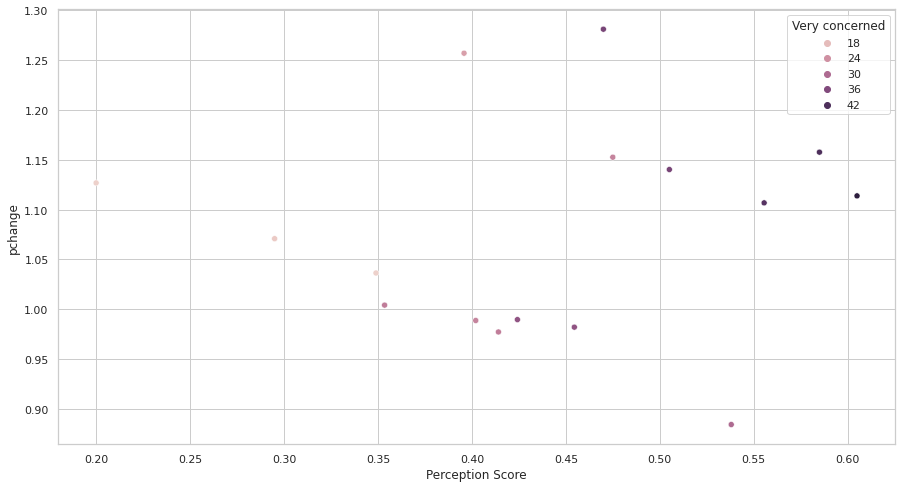

In [ ]:
#sns.set(style='whitegrid')
sns.set(style='whitegrid', rc = {'figure.figsize':(15,8)})
sns.scatterplot(x="Perception Score",
                    y="pchange",
                hue = "Very concerned",
                    data=public_gas)